# Задание
1. Загрузить, просмотреть, определить количество строк и склеить 3 датасета: marketing_campaign.csv, users.csv и subscribers.csv.
2. Определить количество, типы и описательные статистики колонок (столбцов) получившегося датасета.
3. Определить эффективность маркетинговых каналов по привлечению платящих игроков.
4. Определить самую раннюю дату подписки на сервис.
5. Определить портрет аудитории удержанных подписчиков (по возрасту и языку).



In [15]:
# imports
import pandas as pd
import numpy as np

In [16]:
USERS_PATH = 'users.csv'
SUBS_PATH = 'subscribers.csv'
MARKETING_CAMP = 'marketing_campaign.csv'
ADV_PATH = 'Advertising.csv'

user_df = pd.read_csv(USERS_PATH)
subs_df = pd.read_csv(SUBS_PATH)
marketin_df = pd.read_csv(MARKETING_CAMP)
adv_df = pd.read_csv(ADV_PATH)

In [17]:
merge_df = user_df.copy()
merge_df = merge_df.merge(subs_df, on='user_id', how='left', )
merge_df = merge_df.merge(marketin_df, on='user_id', how='left')
merge_df

,user_id,age_group,language_preferred,subscribing_channel,date_subscribed,date_canceled,is_retained,date_served,marketing_channel,variant,language_displayed,converted
0,a1000,0-18 years,English,House Ads,1/1/18,NaN,True,1/1/18,House Ads,personalization,English,True
1,a1001,19-24 years,English,House Ads,1/1/18,NaN,True,1/1/18,House Ads,personalization,English,True
2,a1002,24-30 years,English,House Ads,1/1/18,NaN,True,1/1/18,House Ads,personalization,English,True
3,a1003,30-36 years,English,House Ads,1/1/18,NaN,True,1/1/18,House Ads,personalization,English,True
4,a1004,36-45 years,English,House Ads,1/1/18,NaN,True,1/1/18,House Ads,personalization,English,True
...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a11032,45-55 years,German,Email,1/17/18,1/24/18,False,1/17/18,Email,control,German,True
10033,a11033,55+ years,German,Email,1/17/18,NaN,True,1/17/18,Email,control,German,True
10034,a11034,55+ years,German,Email,1/17/18,NaN,True,1/5/18,Instagram,control,German,False
10035,a11035,0-18 years,German,Email,1/17/18,NaN,True,1/17/18,Email,control,German,True


Колличество колонок дата сета: 12

Типы колонок дата сета: 
user_id: object
age_group: object
language_preferred: object
subscribing_channel: object
date_subscribed: object
date_canceled: object
is_retained: object
date_served: object
marketing_channel: object
variant: object
language_displayed: object
converted: object



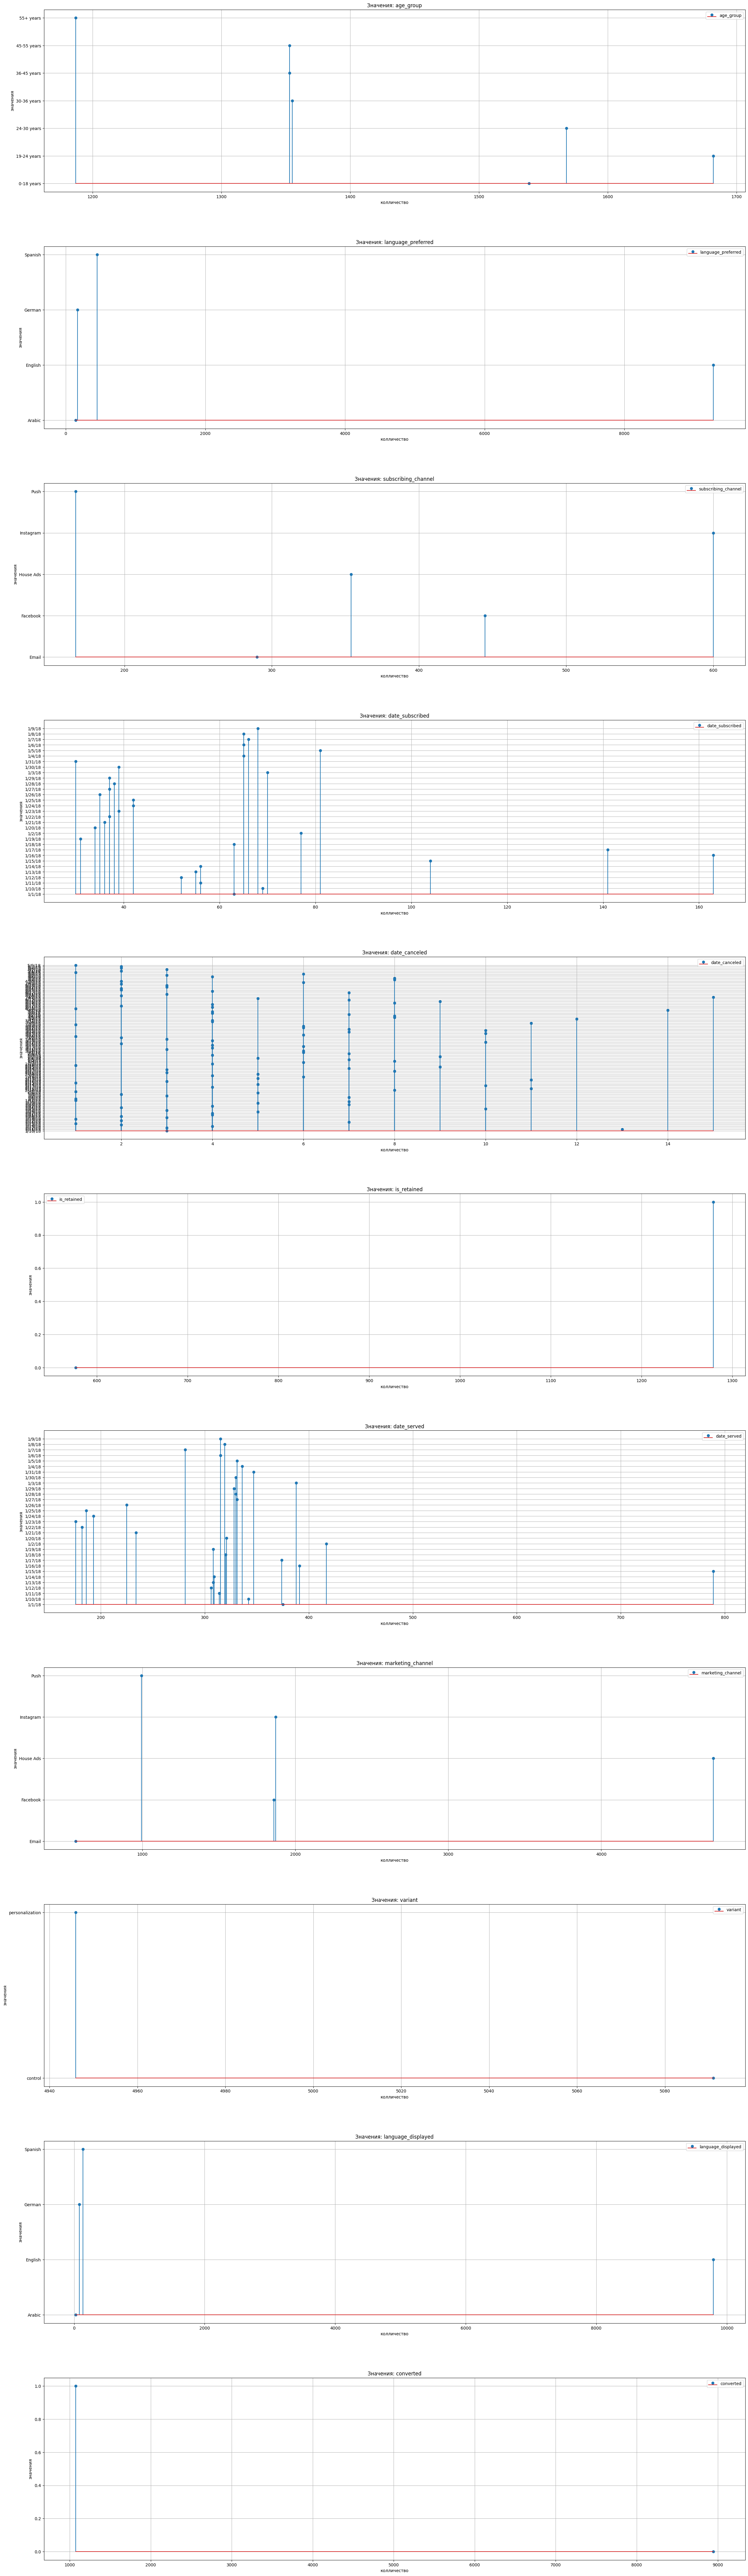

In [21]:
from pandas import DataFrame, Series
from matplotlib import pyplot as plt
from matplotlib.pyplot import subplots_adjust
from typing import cast

WIDTH = 30
HEIGHT = 120
SIZE_W = 1

# task 2
df: DataFrame = merge_df.copy()

column_types = [f"{column}: {str(df.dtypes[column])}" for column in df.columns]
split_char = '\n'

print(f"Колличество колонок дата сета: {len(df.columns)}\n")
print(f"Типы колонок дата сета: \n{split_char.join(column_types)}\n")

column_data = {}
for column in df.columns:
    if column == 'user_id':
        continue
    column_data[column] = df.sort_values(column).groupby(column)[column].value_counts()

SIZE_H = (len(df.columns) + SIZE_W - 1) // SIZE_W

fig = plt.figure(num=1, facecolor='w', edgecolor='k')
fig.set_figwidth(WIDTH )
fig.set_figheight(HEIGHT)
subplots_adjust(hspace=0.3, wspace=0.3)
# print(column_data)


for index, item in enumerate(column_data.items()):
    name, data = item
    # print(name)
    data = cast(Series, data)

    # print(index, WIDTH, i_h, i_w)

    sub_plt = fig.add_subplot(SIZE_H, SIZE_W, index + 1)
    y = list(data.index)
    x = list(data)

    sub_plt.stem(x, y, label=str(name), linefmt='-')
    sub_plt.set_title(f'Значения: {name}')
    sub_plt.set_xlabel('колличество')
    sub_plt.set_ylabel('значения')
    sub_plt.grid()
    sub_plt.legend()

plt.show()